=== Logistic Regression (Full) ===
              precision    recall  f1-score   support

           0       0.65      0.93      0.77      9711
           1       0.93      0.62      0.74     12833

    accuracy                           0.75     22544
   macro avg       0.79      0.78      0.75     22544
weighted avg       0.81      0.75      0.75     22544

ROC-AUC: 0.8970526482306634


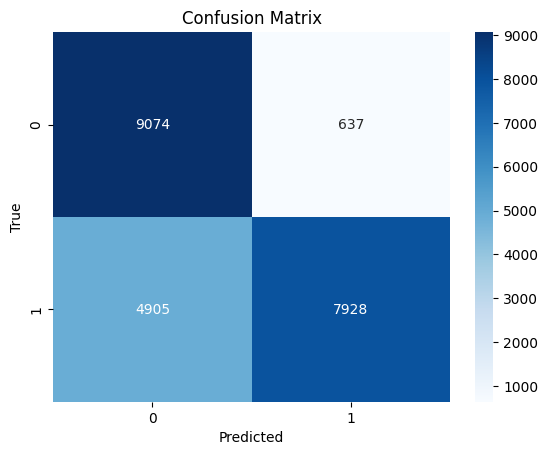

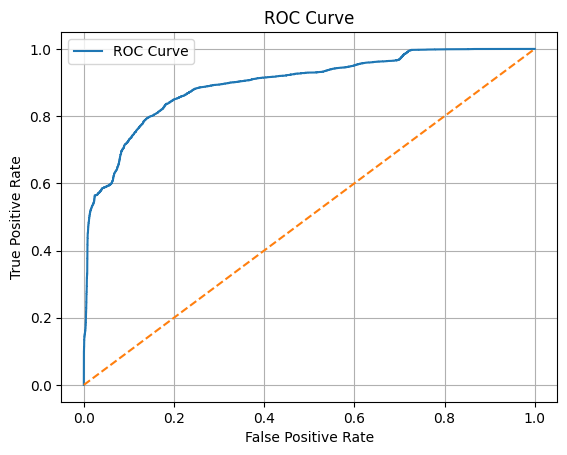

=== Random Forest (Full) ===
              precision    recall  f1-score   support

           0       0.67      0.97      0.79      9711
           1       0.97      0.63      0.76     12833

    accuracy                           0.78     22544
   macro avg       0.82      0.80      0.78     22544
weighted avg       0.84      0.78      0.77     22544

ROC-AUC: 0.9500462573549747


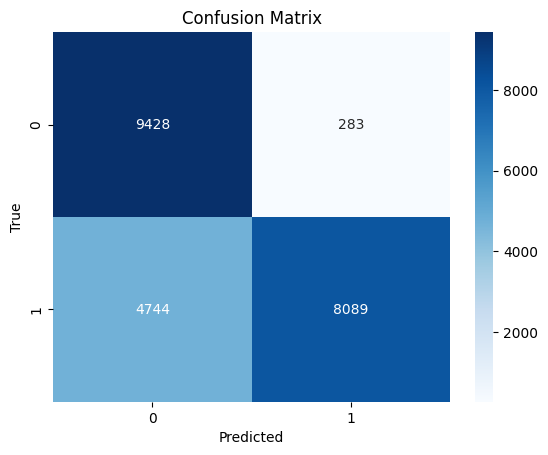

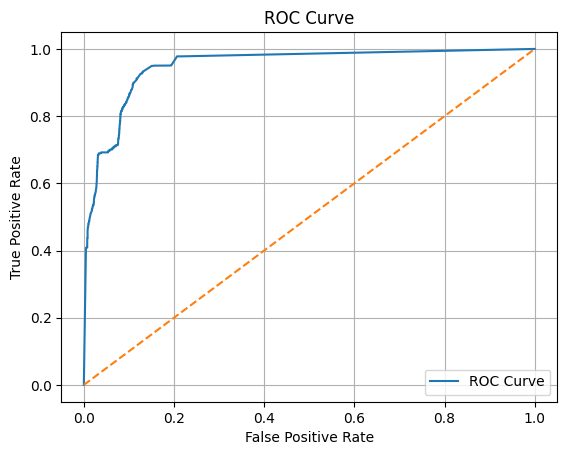

=== XGBoost (Full) ===


c:\Users\Aman Hussain\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [18:18:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.69      0.97      0.81      9711
           1       0.97      0.67      0.79     12833

    accuracy                           0.80     22544
   macro avg       0.83      0.82      0.80     22544
weighted avg       0.85      0.80      0.80     22544

ROC-AUC: 0.9672704528760874


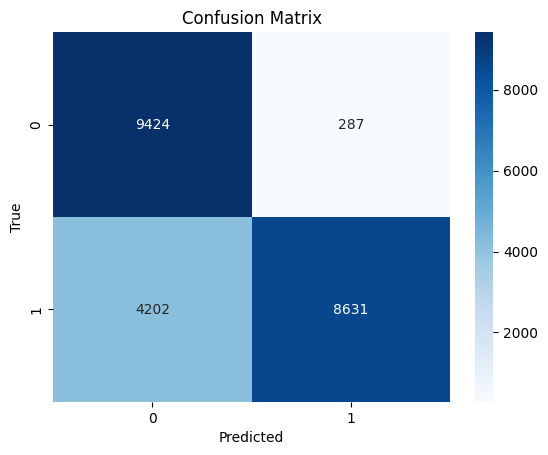

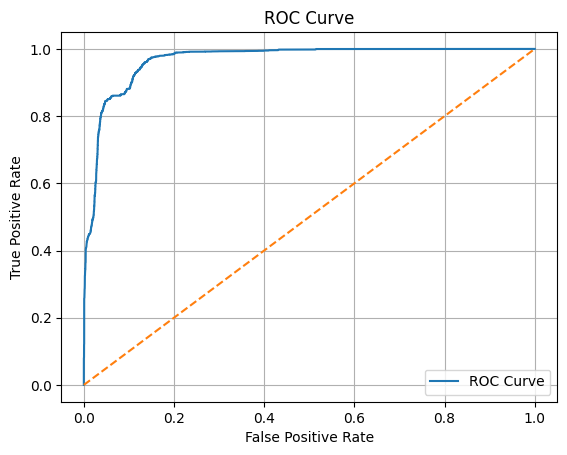

=== Logistic Regression (PCA) ===
              precision    recall  f1-score   support

           0       0.66      0.94      0.78      9711
           1       0.93      0.64      0.76     12833

    accuracy                           0.77     22544
   macro avg       0.80      0.79      0.77     22544
weighted avg       0.81      0.77      0.76     22544

ROC-AUC: 0.9115369020132623


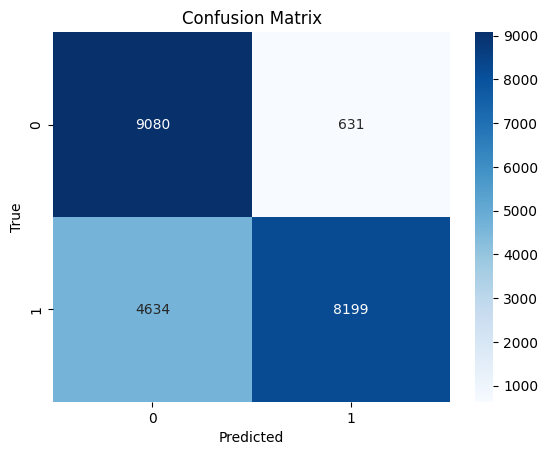

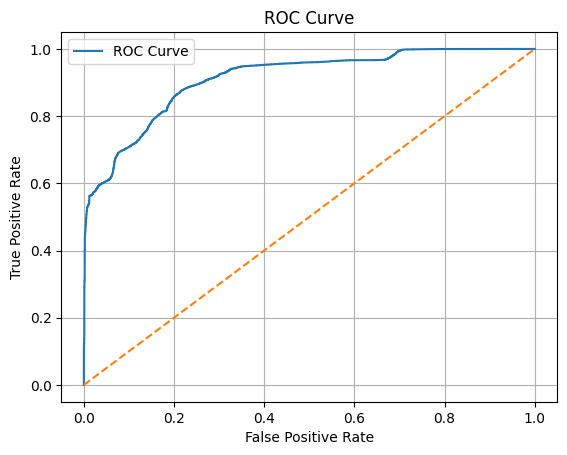

=== Random Forest (PCA) ===
              precision    recall  f1-score   support

           0       0.66      0.97      0.79      9711
           1       0.97      0.63      0.76     12833

    accuracy                           0.77     22544
   macro avg       0.81      0.80      0.77     22544
weighted avg       0.84      0.77      0.77     22544

ROC-AUC: 0.9349737853322831


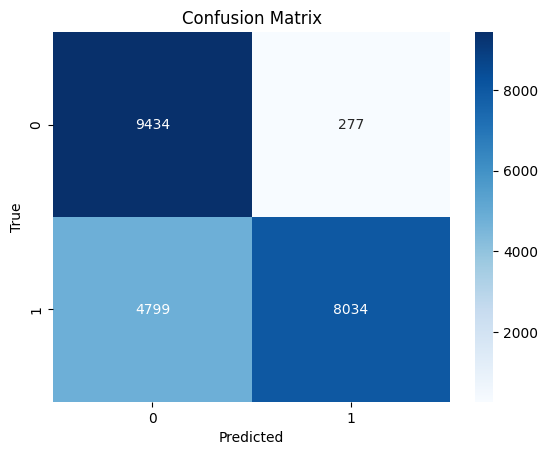

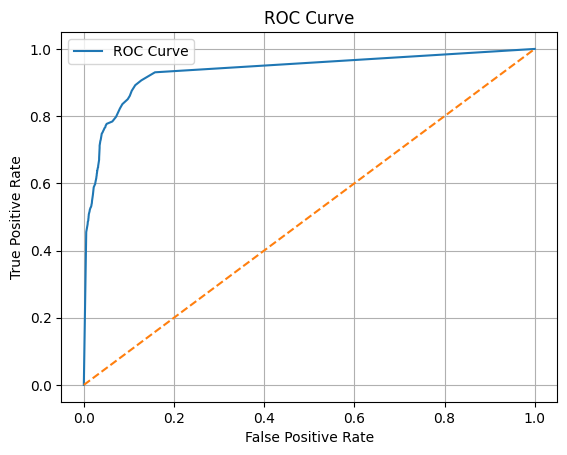

=== XGBoost (PCA) ===


c:\Users\Aman Hussain\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [18:18:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.67      0.97      0.79      9711
           1       0.97      0.64      0.77     12833

    accuracy                           0.78     22544
   macro avg       0.82      0.80      0.78     22544
weighted avg       0.84      0.78      0.78     22544

ROC-AUC: 0.936430097807627


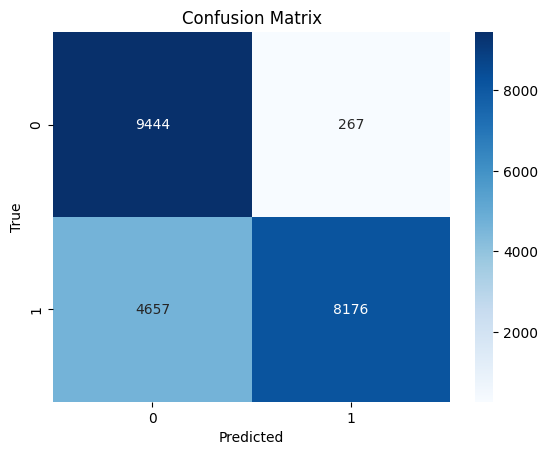

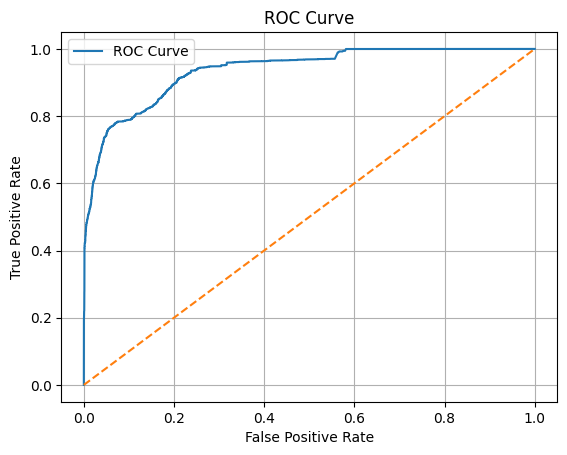

✅ Models saved!


In [1]:
# 🧠 Model Development & Evaluation

# 📦 Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import joblib

# Load data
DATA_DIR = 'data/processed/'

X_train = np.load(DATA_DIR + 'X_train.npy')
y_train = np.load(DATA_DIR + 'y_train.npy')
X_test = np.load(DATA_DIR + 'X_test.npy')
y_test = np.load(DATA_DIR + 'y_test.npy')

X_train_pca = np.load(DATA_DIR + 'X_train_pca.npy')
X_test_pca = np.load(DATA_DIR + 'X_test_pca.npy')

# 📊 Evaluation Function
def evaluate_model(model, X, y_true):
    y_pred = model.predict(X)
    y_prob = model.predict_proba(X)[:, 1] if hasattr(model, 'predict_proba') else y_pred
    print(classification_report(y_true, y_pred))
    print("ROC-AUC:", roc_auc_score(y_true, y_prob))

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    fpr, tpr, _ = roc_curve(y_true, y_prob)
    plt.plot(fpr, tpr, label='ROC Curve')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid(True)
    plt.show()

# ✅ Train and Evaluate on Full Feature Set
print("=== Logistic Regression (Full) ===")
lr_full = LogisticRegression(max_iter=1000)
lr_full.fit(X_train, y_train)
evaluate_model(lr_full, X_test, y_test)

print("=== Random Forest (Full) ===")
rf_full = RandomForestClassifier(n_estimators=100, random_state=42)
rf_full.fit(X_train, y_train)
evaluate_model(rf_full, X_test, y_test)

print("=== XGBoost (Full) ===")
xgb_full = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_full.fit(X_train, y_train)
evaluate_model(xgb_full, X_test, y_test)

# ✅ Train and Evaluate on PCA-Reduced Feature Set
print("=== Logistic Regression (PCA) ===")
lr_pca = LogisticRegression(max_iter=1000)
lr_pca.fit(X_train_pca, y_train)
evaluate_model(lr_pca, X_test_pca, y_test)

print("=== Random Forest (PCA) ===")
rf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pca.fit(X_train_pca, y_train)
evaluate_model(rf_pca, X_test_pca, y_test)

print("=== XGBoost (PCA) ===")
xgb_pca = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_pca.fit(X_train_pca, y_train)
evaluate_model(xgb_pca, X_test_pca, y_test)

# 💾 Save best models
joblib.dump(xgb_full, DATA_DIR + 'xgb_full_model.joblib')
joblib.dump(xgb_pca, DATA_DIR + 'xgb_pca_model.joblib')
print("✅ Models saved!")
